### 1. Setup & Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

project_root = os.path.abspath(os.path.join('..'))
if project_root not in sys.path:
    sys.path.append(project_root)

from sklearn.metrics import classification_report, confusion_matrix
from src.preprocessing import load_data_from_directory
from src.model import train_model, load_trained_model
from src.prediction import predict_audio

2025-07-24 14:19:37.921790: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### 2. Load and Preprocess Data

In [ ]:
X_train, y_train = load_data_from_directory("../data/train", augment=True)
X_test, y_test = load_data_from_directory("../data/test")
print(f"Train: {X_train.shape}, Labels: {np.unique(y_train, return_counts=True)}")
print(f"Test: {X_test.shape}, Labels: {np.unique(y_test, return_counts=True)}")

[INFO] Loaded 1440 valid samples from '../data/train' (augment=True)
[INFO] Loaded 105 valid samples from '../data/test' (augment=False)
Train: (1440, 1024), Labels: (array([0, 1, 2, 3]), array([420, 240, 510, 270]))
Test: (105, 1024), Labels: (array([0, 1, 2, 3]), array([29, 21, 39, 16]))


### 3. Train the Model

In [3]:
model, history = train_model(X_train, y_train)

[INFO] Splitting data: train/test = 0.8/0.2
[INFO] Building model...
[INFO] Starting training...
Epoch 1/100
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3319 - loss: 1.4154
Epoch 1: val_loss improved from inf to 1.30909, saving model to models/yamnet_sesa_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3331 - loss: 1.4136 - val_accuracy: 0.4444 - val_loss: 1.3091 - learning_rate: 0.0010
Epoch 2/100
32/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4008 - loss: 1.2957
Epoch 2: val_loss improved from 1.30909 to 1.15839, saving model to models/yamnet_sesa_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4039 - loss: 1.2914 - val_accuracy: 0.4722 - val_loss: 1.1584 - learning_rate: 0.0010
Epoch 3/100
34/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4796 - loss: 1.1792
Epoch 3: val_loss improved from 1.15839 to 1.05385, saving model to models/yamnet_sesa_model.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4812 - loss: 1.1769 -

### 4. Evaluate Model

In [4]:
# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Classification report
print(classification_report(y_test, y_pred, target_names=["Casual", "Gunshot", "Explosion", "Siren/Alarm"]))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
              precision    recall  f1-score   support

      Casual       0.83      0.86      0.85        29
     Gunshot       0.94      0.76      0.84        21
   Explosion       0.90      0.97      0.94        39
 Siren/Alarm       1.00      1.00      1.00        16

    accuracy                           0.90       105
   macro avg       0.92      0.90      0.91       105
weighted avg       0.91      0.90      0.90       105



### 5. Confusion Matrix

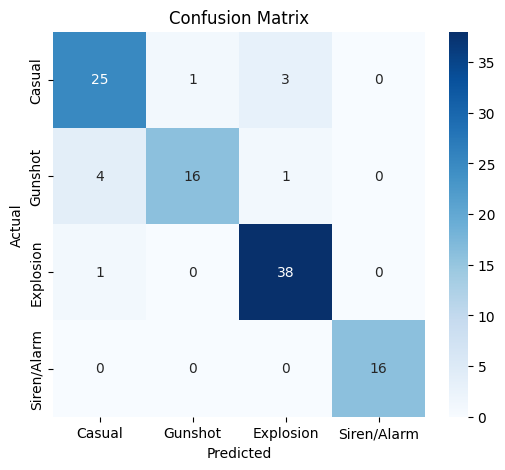

In [5]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Casual", "Gunshot", "Explosion", "Siren/Alarm"], yticklabels=["Casual", "Gunshot", "Explosion", "Siren/Alarm"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

### 6. Save Model

In [6]:
model.save("../models/yamnet_sesa_model.keras")

### 7. Test on a Single .wav File

In [19]:

result = predict_audio("../data/test/siren_050.wav", model)
if result is not None:
	print(f"Predicted: {result['label']} with confidence {result['confidence']:.2f}")
else:
	print("Prediction failed: No result returned.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Predicted: Siren/Alarm with confidence 1.00
